## plot_2d_sparse_grids.py
plots anisotropic full grids that form part of the combination technique


In [1]:
from argparse import ArgumentParser
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import pysgpp
from pysgpp.pysgpp_swig import DataVector, CombigridOperation
from pysgpp.extensions.datadriven.uq.dists import J, Beta, Uniform, Normal
from pysgpp.extensions.datadriven.uq.plot.colors import load_color, savefig,\
    load_font_properties
from pysgpp.extensions.datadriven.uq.plot.plot2d import plotDensity2d

In [2]:
def g(x):
    return np.prod([4 * xi * (1 - xi) for xi in x.array()])

# We have to wrap f in a pysgpp.MultiFunction object.
func = pysgpp.multiFunc(g)
numDims = 2

/home/pollinta/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/pollinta/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


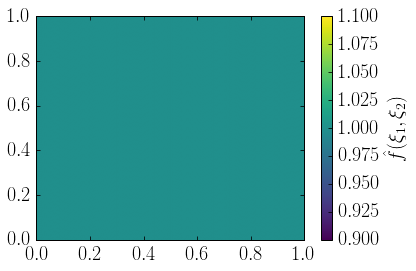

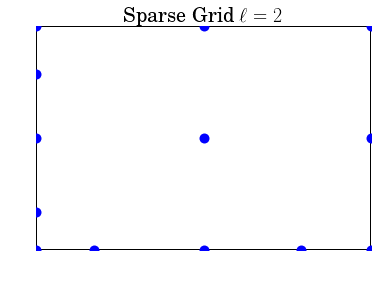

In [6]:
def plot_pdf(marginal=Uniform(0,1), level=2):
    # plot pdf
    dist = J([marginal] * numDims)
    fig = plt.figure()
    plotDensity2d(dist)
    # savefig(fig, "/tmp/%s" % (marginal,))
    # plt.close(fig)

    w = pysgpp.singleFunc(marginal.pdf)

    grids = pysgpp.AbstractPointHierarchyVector()
    grids.push_back(pysgpp.CombiHierarchies.linearLeja(w))
    grids.push_back(pysgpp.CombiHierarchies.linearLeja(w))

    evaluators = pysgpp.FloatScalarAbstractLinearEvaluatorVector()
    evaluators.push_back(pysgpp.CombiEvaluators.polynomialInterpolation())
    evaluators.push_back(pysgpp.CombiEvaluators.polynomialInterpolation())

    # To create a CombigridOperation object with our own configuration, we have to provide a
    # LevelManager as well:
    levelManager = pysgpp.WeightedRatioLevelManager()
    operation = pysgpp.CombigridOperation(grids, evaluators, levelManager, func)

    # We can add regular levels like before:
    levelManager.addRegularLevels(level)

    # We can also fetch the used grid points and plot the grid:
    grid = levelManager.getGridPointMatrix()
    gridList = [[grid.get(r, c) for c in range(grid.getNcols())] for r in range(grid.getNrows())]

    fig = plt.figure()
    plt.plot(gridList[0], gridList[1], " ",
             color=load_color(0),
             marker='o', markersize=10)
    plt.axis('off')
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((0, 0), 1, 1, fill=None, alpha=1, linewidth=2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(r"Sparse Grid $\ell=%i$" % level,
              fontproperties=load_font_properties())
    plt.show()
    # savefig(fig, "/tmp/sparse_grid_l%i_%s" % (args.level, args.marginalType))

plot_pdf()

/home/pollinta/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/pollinta/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


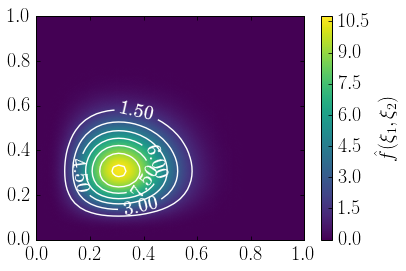

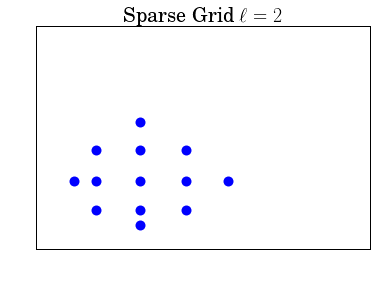

In [7]:
plot_pdf(Beta(5, 10))

/home/pollinta/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/pollinta/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


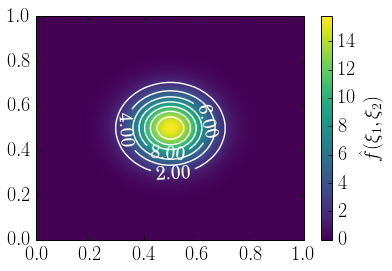

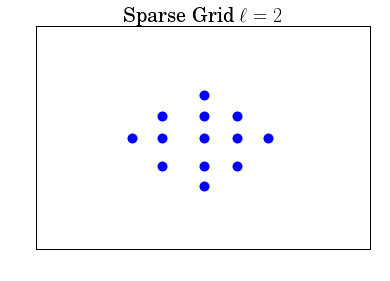

In [8]:
plot_pdf(Normal(0.5, 0.1, 0, 1))